## 05-1 클래스

### 클래스는 왜 필요한가?

계산기의 "더하기" 기능을 구현한 파이썬 코드는 다음과 같다.

In [5]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))
print(add(5))

3
7
12


이전에 계산한 결괏값을 유지하기 위해서 result 전역 변수(global)를 사용했다.

그런데 만일 한 프로그램에서 2대의 계산기가 필요한 상황이 발생하면 어떻게 해야 할까?   
각 계산기는 각각의 결괏값을 유지해야 하기 때문에 위와 같이 add 함수 하나만으로는 결괏값을 따로 유지할 수 없다.

이런 상황을 해결하려면 다음과 같이 함수를 각각 따로 만들어야 한다.

똑같은 일을 하는 add1과 add2 함수를 만들었고 각 함수에서 계산한 결괏값을 유지하면서   
저장하는 전역 변수 result1, result2가 필요하게 되었다.

In [6]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


계산기 1의 결괏값이 계산기 2에 아무 영향을 끼치지 않음을 확인할 수 있다.   
하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할까?   

그때마다 전역 변수와 함수를 추가할 것인가? 여기에 계산기마다 빼기나 곱하기와   
같은 기능을 추가해야 한다면 상황은 점점 더 어려워질 것이다.

아직 클래스에 대해 배우지 않았지만, 위와 같은 경우에 클래스를 사용하면 다음과 같이 간단하게 해결할 수 있다.

In [1]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result
    
cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))
    

3
7
3
10


프로그램을 실행하면 함수 2개를 사용했을 때와 동일한 결과가 출력된다.  

Calculator 클래스로 만든 별개의 계산기 cal1, cal2(파이썬에서는 이것을 객체라고 부른다)가 각각의 역할을 수행한다.   
그리고 계산기(cal1, cal2)의 결괏값 역시 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다.  
 
클래스를 사용하면 계산기 대수가 늘어나더라도 객체를 생성만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다.   
만약 빼기 기능을 더하려면 Calculator 클래스에 다음과 같은 빼기 기능 함수를 추가해 주면 된다.

```python
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

    def sub(self, num): // 추가
        self.result -= num
        return self.result
```

### 클래스와 객체

클래스를 가장 잘 설명 해 주는 다음의 그림을 보자.

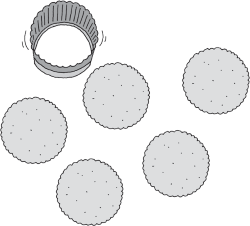

과자를 만드는 과자 틀과 그것을 사용해 만든 과자이다.  

- 과자 틀 → 클래스 (class)
- 과자 틀에 의해서 만들어진 과자 → 객체 (object)

여기에서 설명할 클래스는 과자 틀과 비슷하다.   
클래스(class)란 똑같은 무엇인가를 계속해서 만들어 낼 수 있는 설계 도면이고(과자 틀),  
객체(object)란 클래스로 만든 피조물(과자 틀을 사용해 만든 과자)을 뜻한다.

클래스로 만든 객체에는 중요한 특징이 있다. 바로 객체마다 고유한 성격을 가진다는 것이다.   
과자 틀로 만든 과자에 구멍을 뚫거나 조금 베어 먹더라도 다른 과자에는 아무 영향이 없는 것과 마찬가지로   
동일한 클래스로 만든 객체들은 서로 전혀 영향을 주지 않는다.

다음은 파이썬 클래스의 가장 간단한 예이다.

```python
>>> class Cookie:
>>>     pass
```

위의 클래스는 아무 기능도 갖고 있지 않은 껍질뿐인 클래스이다.   
하지만 이렇게 껍질뿐인 클래스도 객체를 생성하는 기능이 있다. "과자 틀"로 "과자"를 만드는 것처럼 말이다.

객체는 클래스로 만들며 1개의 클래스는 무수히 많은 객체를 만들어 낼 수 있다.   
위에서 만든 Cookie 클래스의 객체를 만드는 방법은 다음과 같다.

```python
>>> a = Cookie()
>>> b = Cookie()
```


Cookie()의 결괏값을 돌려받은 a와 b가 바로 객체이다. 마치 함수를 사용해서 그 결괏값을 돌려받는 모습과 비슷하다.


#### 객체와 인스턴스의 차이

> 클래스로 만든 객체를 인스턴스라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까?   
>  
> 이렇게 생각해 보자. a = Cookie() 이렇게 만든 a는 객체이다.   
> 그리고 a 객체는 Cookie의 인스턴스이다.   
> 즉 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다.   
> 
> "a는 인스턴스"보다는 "a는 객체"라는 표현이 어울리며   
>"a는 Cookie의 객체"보다는 "a는 Cookie의 인스턴스"라는 표현이 훨씬 잘 어울린다.

